# Bone size, mineral and density (DXA) dataset  

### Description 

Bone density was profiled based on DXA imaging, and includes measurements of mineral content in different parts of a variety of skeletal components.

### Introduction

DXA (dual-energy x-ray absorptiometry) imaging is a method used to measure bone density and mineral content. A DXA scan uses a low dose of ionizing radiation to produce a detailed image of the body, specifically the bones. The scan is then analyzed by a software to determine the bone mineral density (BMD) and bone mineral content (BMC) in different parts of the body. This method is considered to be one of the most accurate methods for measuring bone density, as it is able to provide detailed information about the distribution of bone mineral content in different bony structures of the body skeleton. The spine and hip are most commonly measured because that is where most osteoporotic fractures occur. DXA imaging is commonly used for assessing the risk of osteoporosis, a condition characterized by low bone density and increased risk of fractures, and for monitoring the effects of treatments for the condition.

### Measurement protocol 
<!-- long measurment protocol for the data browser -->
Dual-energy X-ray Absorptiometry (DXA) was performed with the GE Lunar Prodigy Advance device (GE Healthcare, USA) and the GE CoreScan and OneScan software applications. Before the scan, participants were asked to remove all metal items, heavy clothing and shoes. Bone mineral density was measured from the Femur necks, bilaterally and from the spine vertebra L1-L4. The Spine and femur imaging was performed with the OneScan, which performs an anterior posterior (AP) Spine and the dual femur exam without repositioning between scans. Participants were placed on the scanner bed with legs internally rotated and secured using a foot brace. 
The AP Spine measurement and analysis provides an estimate of bone mineral density for the lumbar spine while the Dual Femur measurement measures the density in the proximal femurs (femur neck). These values can then be compared to reference populations providing Z-scores that are matched for age, sex and ethnicity; and T-scores which indicate how many standard deviations a patient's value is from the mean value of a healthy Young Adult reference population (NHANES).  

![DXA](dxa_machine.jpeg)

### Data availability 
<!-- for the example notebooks -->
The information is stored in 1 parquet file: `bone_density.parquet`

### Summary of available data 
<!-- for the data browser -->
1. Measurements of mineral content in different parts of a variety of skeletal components.
2. Age, sex and ethnicity normalized values for the above measurements.
3. DXA image files (e.g., total body composition - BMD).
4. DXA image DICOM files.

### Relevant links

* Pheno Knowledgebase: https://knowledgebase.pheno.ai/datasets/022-bone_density.html
* Pheno Data Browser: https://pheno-demo-app.vercel.app/folder/22


In [1]:
#| echo: false
import pandas as pd
pd.set_option("display.max_rows", 500)

In [2]:
from pheno_utils import PhenoLoader

In [3]:
pl = PhenoLoader('bone_density')
pl

PhenoLoader for bone_density with
289 fields
2 tables: ['bone_density', 'age_sex']

# Data dictionary

In [4]:
pl.dict

folder_id   feature_set  \
tabular_field_name                                           
collection_date                           22  bone_density   
timezone                                  22  bone_density   
collection_timestamp                      22  bone_density   
body_arm_left_area                        22  bone_density   
body_arm_left_bmc                         22  bone_density   
body_arm_left_bmd                         22  bone_density   
body_arm_right_area                       22  bone_density   
body_arm_right_bmc                        22  bone_density   
body_arm_right_bmd                        22  bone_density   
body_arms_area                            22  bone_density   
body_arms_bmc                             22  bone_density   
body_arms_bmd                             22  bone_density   
body_dose                                 22  bone_density   
body_head_area                            22  bone_density   
body_head_bmc                             22  bone_density   
body_head_bmd                             22  bone_density   
body_leg_left_area                        22  bone_density   
body_leg_left_bmc                         22  bone_density   
body_leg_left_bmd                         22  bone_density   
body_leg_right_area                       22  bone_density   
body_leg_right_bmc                        22  bone_density   
body_leg_right_bmd                        22  bone_density   
body_legs_area                            22  bone_density   
body_legs_bmc                             22  bone_density   
body_legs_bmd                             22  bone_density   
body_pelvis_area                          22  bone_density   
body_pelvis_bmc                           22  bone_density   
body_pelvis_bmd                           22  bone_density   
body_ribs_area                            22  bone_density   
body_ribs_bmc                             22  bone_density   
body_ribs_bmd                             22  bone_density   
body_spine_area                           22  bone_density   
body_spine_bmc                            22  bone_density   
body_spine_bmd                            22  bone_density   
body_total_area                           22  bone_density   
body_total_bmc                            22  bone_density   
body_total_bmd                            22  bone_density   
body_total_left_area                      22  bone_density   
body_total_left_bmc                       22  bone_density   
body_total_left_bmd                       22  bone_density   
body_total_right_area                     22  bone_density   
body_total_right_bmc                      22  bone_density   
body_total_right_bmd                      22  bone_density   
body_trunk_area                           22  bone_density   
body_trunk_bmc                            22  bone_density   
body_trunk_bmd                            22  bone_density   
body_trunk_left_area                      22  bone_density   
body_trunk_left_bmc                       22  bone_density   
body_trunk_left_bmd                       22  bone_density   
body_trunk_right_area                     22  bone_density   
body_trunk_right_bmc                      22  bone_density   
body_trunk_right_bmd                      22  bone_density   
femur_left_lower_neck_area                22  bone_density   
femur_left_lower_neck_bmc                 22  bone_density   
femur_left_lower_neck_bmd                 22  bone_density   
femur_left_neck_am_percent                22  bone_density   
femur_left_neck_area                      22  bone_density   
femur_left_neck_bmc                       22  bone_density   
femur_left_neck_bmd                       22  bone_density   
femur_left_neck_t_score                   22  bone_density   
femur_left_neck_ya_percent                22  bone_density   
femur_left_neck_z_score                   22  bone_density   
femur_left_shaft_area                     22  bone_density   
femur

# Plot histogram and ecdf for body_arms_bmd at baseline visit


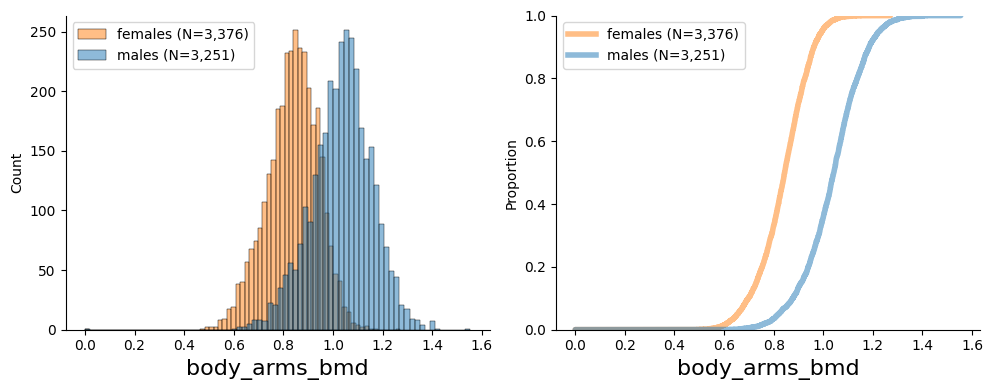

count      mean       std  min       25%       50%       75%  \
body_arms_bmd  6627.0  0.934747  0.150495  0.0  0.828062  0.929647  1.043635   

                    max  
body_arms_bmd  1.554153

In [5]:
from pheno_utils.basic_plots import hist_ecdf_plots

col = "body_arms_bmd"
df = pl[[col] + ["age", "sex", "collection_date"]].loc[:,:,"00_00_visit",0,:]

# plot histogram and ecdf
hist_ecdf_plots(df.dropna(subset=[col,"sex", "age"]), col, gender_col="sex")

# stats
display(df[col].describe().to_frame().T)